In [1]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.compose import make_column_selector as selector

In [2]:
data=pd.read_csv('regression_data.csv')

In [3]:
data.drop('LogRate',axis=1,inplace=True)

In [4]:
data

,Age,AppliedAmount,Amount,Interest,LoanDuration,EmploymentDurationCurrentEmployer,IncomeTotal,LiabilitiesTotal,DebtToIncome,MonthlyPaymentDay,...,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,RecoveryStage,Rating,Restructured,CreditScoreEsMicroL,Default
0,61,319.5582,115.0408,30.00,12,0,3665.0,0.00,0.00,25,...,3.0,0,0,0,-1,NaN,0,False,0,0
1,48,191.7349,140.6057,25.00,1,1,3665.0,0.00,0.00,15,...,5.0,1,0,1,-1,NaN,0,False,0,0
2,58,319.5582,319.5409,25.00,20,2,3665.0,0.00,0.00,25,...,4.0,0,0,2,-1,NaN,0,True,0,1
3,23,127.8233,57.5205,45.00,15,0,3665.0,0.00,0.00,15,...,2.0,2,-1,3,-1,NaN,0,False,0,0
4,25,319.5582,319.5436,30.00,12,0,3665.0,0.00,0.00,25,...,4.0,3,0,0,-1,NaN,0,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,37,3000.0000,3000.0000,31.01,60,1,1400.0,500.00,7.69,1,...,3.0,2,0,3,4,2.0,4,False,0,1
77390,35,3000.0000,3000.0000,18.25,60,1,2265.0,1670.44,31.58,7,...,3.0,2,0,6,5,1.0,6,False,0,0
77391,40,2500.0000,2500.0000,24.83,60,1,2500.0,1350.00,3.22,1,...,3.0,0,1,7,5,2.0,0,False,0,1
77392,47,3000.0000,3000.0000,17.74,60,1,540.0,732.05,44.35,1,...,5.0,0,0,9,1,2.0,6,True,0,1


In [5]:
cat_cols=['NewCreditCustomer','VerificationType','LanguageCode','Gender','UseOfLoan','Education','MaritalStatus','EmploymentStatus','OccupationArea',
'HomeOwnershipType','RecoveryStage','Rating','Restructured','Default','CreditScoreEsMicroL']
for i in cat_cols:
    data[i]=data[i].astype('category')

In [6]:
num_cols=data.select_dtypes(include=['int','float']).columns
num_cols

Index(['Age', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'EmploymentDurationCurrentEmployer', 'IncomeTotal', 'LiabilitiesTotal',
       'DebtToIncome', 'MonthlyPaymentDay', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'LogBidsPortfolioManager',
       'LogBidsApi', 'LogBidsManual', 'LogInterest', 'LogMonthlyPayment',
       'LogIncomeTotal', 'LogExistingLiabilities', 'LogRefinanceLiabilities',
       'LogFreeCash', 'LogInterestAndPenaltyPaymentsMade',
       'LogPreviousEarlyRepaymentsCountBeforeLoan', 'EMI', 'ELA', 'ROI'],
      dtype='object')

In [7]:
cat_cols=data.select_dtypes(exclude=['int','float']).columns
cat_cols

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'OccupationArea', 'HomeOwnershipType', 'RecoveryStage', 'Rating',
       'Restructured', 'CreditScoreEsMicroL', 'Default'],
      dtype='object')

In [8]:
data.isnull().sum()

Age                                              0
AppliedAmount                                    0
Amount                                           0
Interest                                         0
LoanDuration                                     0
EmploymentDurationCurrentEmployer                0
IncomeTotal                                      0
LiabilitiesTotal                                 0
DebtToIncome                                     0
MonthlyPaymentDay                                0
CreditScoreEeMini                            43030
PrincipalPaymentsMade                            0
PrincipalBalance                                 0
InterestAndPenaltyBalance                        0
NoOfPreviousLoansBeforeLoan                      0
AmountOfPreviousLoansBeforeLoan                  0
LogBidsPortfolioManager                          0
LogBidsApi                                       0
LogBidsManual                                    0
LogInterest                    

In [9]:
# Step 1 -> train/test/split
X = data.drop(['EMI', 'ELA', 'ROI'], axis=1)
y = data[['EMI', 'ELA', 'ROI']]

In [10]:
cat_cols=X.select_dtypes(exclude=['int','float']).columns
cat_cols

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'OccupationArea', 'HomeOwnershipType', 'RecoveryStage', 'Rating',
       'Restructured', 'CreditScoreEsMicroL', 'Default'],
      dtype='object')

In [11]:
num_cols=X.select_dtypes(include=['int','float']).columns
num_cols

Index(['Age', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'EmploymentDurationCurrentEmployer', 'IncomeTotal', 'LiabilitiesTotal',
       'DebtToIncome', 'MonthlyPaymentDay', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'LogBidsPortfolioManager',
       'LogBidsApi', 'LogBidsManual', 'LogInterest', 'LogMonthlyPayment',
       'LogIncomeTotal', 'LogExistingLiabilities', 'LogRefinanceLiabilities',
       'LogFreeCash', 'LogInterestAndPenaltyPaymentsMade',
       'LogPreviousEarlyRepaymentsCountBeforeLoan'],
      dtype='object')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [17]:
ind=[]
for i in cat_cols:
    index=data.columns.get_loc(i)
    ind.append(index)

In [18]:
ind

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]

In [20]:
ind_num=[]
for i in num_cols:
    index=data.columns.get_loc(i)
    ind_num.append(index)

In [21]:
ind_num

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

In [34]:
# y_test=scale_y.transform(y_test)

In [35]:
# scale_y.inverse_transform(y_test)

array([[1.26926250e+05, 4.80000000e+02, 3.73943530e+01],
       [9.41684400e+04, 2.64345000e+02, 2.60300318e+01],
       [9.28000000e+04, 8.85000000e+01, 2.24806202e+01],
       ...,
       [1.87769010e+05, 7.09152000e+02, 3.63422242e+01],
       [1.78610000e+04, 5.26680000e+01, 2.52056844e+01],
       [5.60000000e+04, 1.95600000e+02, 2.18750000e+01]])

In [36]:
# y_test

array([[ 0.51022675,  0.79638884,  1.07054466],
       [ 0.07487167, -0.11418325, -0.01773501],
       [ 0.05668494, -0.85666336, -0.35763675],
       ...,
       [ 1.31883407,  1.76395007,  0.96978982],
       [-0.93926304, -1.00795881, -0.09667686],
       [-0.43239132, -0.40444908, -0.41563266]])

In [16]:
import pandas as pd
import xgboost as xg

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [17]:
# train the model
from sklearn.multioutput import MultiOutputRegressor
multioutputregressor=MultiOutputRegressor(xg.XGBRegressor(objective='reg:squarederror',n_estimators=800,reg_lambda=1,gamma=0,max_depth=20,learning_rate=.5))


In [18]:
##visualize Pipeline
from sklearn import set_config
set_config(display="diagram")

# PIPELINE

In [42]:
# pipe = Pipeline([
#     ('IMPUTE',impute),
#     ('OHE',OHE),
#     ('SCALE_X',scale_x),
#     ('multioutputregressor',multioutputregressor)
# ])

In [19]:
numeric_processor=Pipeline(
    steps=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="mean")),
          ("scaler",StandardScaler())]

)

In [30]:
categorical_processor=Pipeline(
    steps=[("imputation_consatnt",SimpleImputer(strategy='most_frequent')),
          ("onehot",OneHotEncoder(drop='first',sparse=False,handle_unknown="ignore"))]

)

In [31]:
preprocessor=ColumnTransformer(
    [("categorical",categorical_processor,selector(dtype_exclude=['int','float'])),
    ("numerical",numeric_processor,selector(dtype_include=['int','float']))]


)

In [32]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_consatnt',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001AD6A75D1F0>),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001AD70BDB2E0>)])

In [33]:
pipe=make_pipeline(preprocessor,multioutputregressor)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AD6A75D1F0>),
                                                 ('numerical',
                                                  Pipeline(...
                                                             importance_type='gain',
                                                             interaction_constraints=None,
                                                             learning_rate=0.5,
                                                             max_delta_step=None,
                                                             max_depth=20,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=800,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=1,
                                                             scale_pos_weight=None,
                                                             subsample=None,
                                                             tree_method=None,
                                                             validate_parameters=None,
                                                             verbosity=None)))])

In [44]:
scaler_y=StandardScaler()
y_train=scaler_y.fit_transform(y_train)
y_test=scaler_y.transform(y_test)

In [56]:
# train
pipe_regression_model=pipe.fit(X_train,y_train)

In [57]:
pipe_regression_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AD6A75D1F0>),
                                                 ('numerical',
                                                  Pipeline(...
                                                             importance_type='gain',
                                                             interaction_constraints=None,
                                                             learning_rate=0.5,
                                                             max_delta_step=None,
                                                             max_depth=20,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=800,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=1,
                                                             scale_pos_weight=None,
                                                             subsample=None,
                                                             tree_method=None,
                                                             validate_parameters=None,
                                                             verbosity=None)))])

In [58]:
y_pred=pipe.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [59]:
# model evaluation
print('Model Evaluation:')
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, y_pred))
print('R2_score : ', r2_score(y_test, y_pred))

Model Evaluation:
mean_squared_error :  0.006617093040988742
mean_absolute_percentage_error :  0.0696308302183749
R2_score :  0.9933206114983465


In [50]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Residual plot')

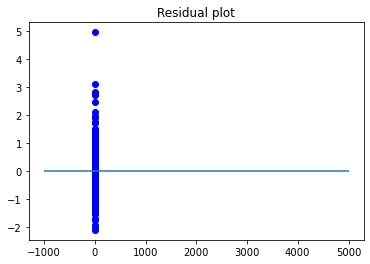

In [60]:
x_plot = plt.scatter(y_pred, (y_pred - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

In [61]:
y_pred[0]

array([0.51021713, 0.796404  , 1.0705463 ], dtype=float32)

In [62]:
y_test[0]

array([0.51022675, 0.79638884, 1.07054466])

In [63]:
import pickle
pickle.dump(pipe_regression_model,open('C:/Users/ASUS/technocolabs/ML_DEPLOYMENT_MODELS/regression_xgboost_pipeline.pkl',"wb"))